# Generate the Pretrained Model
This notebook uses the pre-trained [micro_speech](https://github.com/tensorflow/tensorflow/tree/v2.4.1/tensorflow/lite/micro/examples/micro_speech) example for [TensorFlow Lite for MicroControllers](https://www.tensorflow.org/lite/microcontrollers/overview) 20 kB [Simple Audio Recognition](https://www.tensorflow.org/tutorials/sequences/audio_recognition) model to recognize keywords! This Colab follows from the end of the [Course 2 Colab](https://colab.research.google.com/github/tinyMLx/colabs/blob/master/3-5-13-PretrainedModel.ipynb) which converted the model into a TFLite file. In this Colab you will convert that TFLite file into a TFLite Micro file which can be uploaded to your microcontroller using the Arduino IDE.

### Load the pretrained Tensorflow Lite model
Run the below cell to dowload the staff's copy of the pretrained ```.tflite``` file for the "yes,no" KWS model from Course 2.

In [ ]:
!wget --no-check-certificate --content-disposition https://github.com/tinyMLx/colabs/blob/master/KWS_yes_no.tflite?raw=true

### Generate a TensorFlow Lite for Microcontrollers Model
To convert the TensorFlow Lite quantized model into a C source file that can be loaded by TensorFlow Lite for Microcontrollers on Arduino we simply need to use the ```xxd``` tool to convert the ```.tflite``` file into a ```.cc``` file.

In [ ]:
!apt-get update && apt-get -qq install xxd

In [ ]:
MODEL_TFLITE = 'KWS_yes_no.tflite'
MODEL_TFLITE_MICRO = 'KWS_yes_no.cc'
!xxd -i {MODEL_TFLITE} > {MODEL_TFLITE_MICRO}
REPLACE_TEXT = MODEL_TFLITE.replace('/', '_').replace('.', '_')
!sed -i 's/'{REPLACE_TEXT}'/g_model/g' {MODEL_TFLITE_MICRO}

That's it! You've successfully converted your TensorFlow Lite model into a TensorFlow Lite for Microcontrollers model! Run the cell below to print out its contents which we'll need for our next step, deploying the model using the Arudino IDE! **So don't close this Colab as we'll use the model printout in the next step of the deployment to the Arduino IDE!**

In [ ]:
!cat {MODEL_TFLITE_MICRO}

If you'd like to download your model for safekeeping:
1. On the left of the UI click on the folder icon
2. Click on the three dots to the right of the ```KWS_yes_no.cc``` file and select download

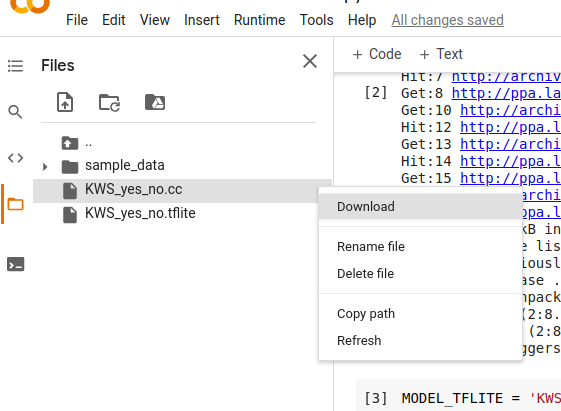